In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1D MASK

In [5]:
csv = pd.read_csv("start_noise.csv", delimiter=' ', header=None)
bn_1D = np.array(csv)
bn_len = bn_1D.shape[0]
bn_1D = bn_1D.T
bn_1D = bn_1D[0:bn_len]
bn_1D = bn_1D.astype(float)

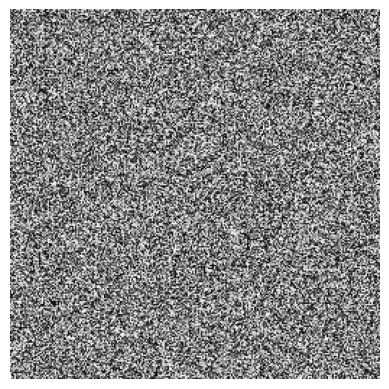

In [6]:
plt.imshow(bn_1D, cmap='gray')
plt.axis('off')
plt.savefig("1D_start_mask.png")

### 2D MASK

In [23]:
csv2D = pd.read_csv("start_noise_2D.csv", delimiter='\t', header=None)

In [24]:
csv2D = np.array(csv2D)
len_csv2D = csv2D.shape[0]
csv2D = csv2D.T
csv2D = csv2D[0:len_csv2D]

In [25]:
r_channel = []
g_channel = []
for i in range(csv2D.shape[0]):
    r_channel.append([])
    g_channel.append([])
    for j in range(csv2D.shape[1]):
        tmp = str(csv2D[i][j])
        tmp = tmp.strip()
        tmp = tmp.split(' ')
        r_channel[len(r_channel) - 1].append(tmp[0])
        g_channel[len(g_channel) - 1].append(tmp[1])

In [26]:
r_channel = np.array(r_channel).astype(float)
g_channel = np.array(g_channel).astype(float)
b_channel = np.zeros_like(r_channel)

In [27]:
bn_2D = np.dstack((r_channel, g_channel))

In [28]:
img2D = np.dstack((r_channel, g_channel, b_channel))

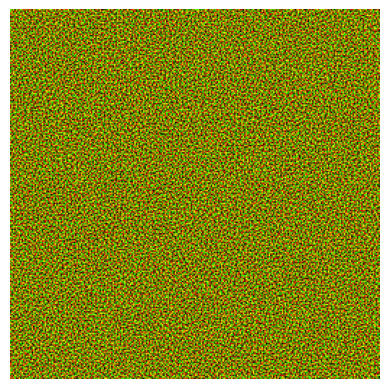

In [22]:
plt.imshow(img2D)
plt.axis('off')
plt.savefig("2D_mask.png")

### Оценка спектром

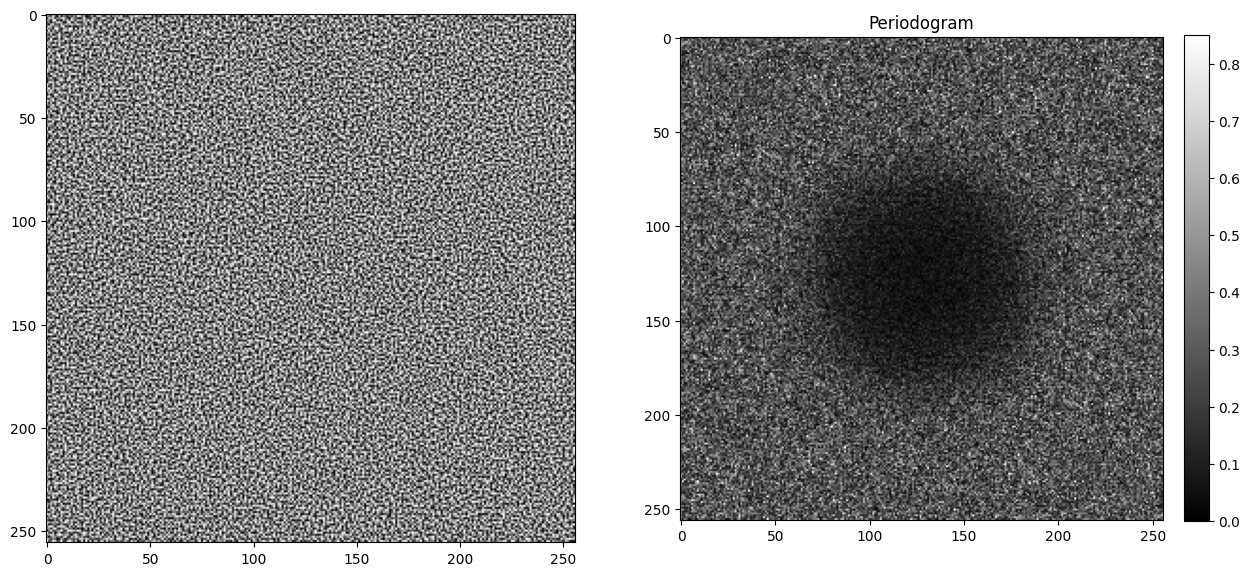

In [15]:
def plotFFT1D(pattern):
  fig, axs = plt.subplots(1, 2, figsize=(15, 10))
  axs[0].imshow(pattern, cmap='gray')
  axs[1].set_title('Periodogram')
  im = axs[1].imshow(np.abs(np.fft.fftshift(np.fft.fft2(pattern - np.mean(pattern))/ pattern.shape[0])), vmin=0.0, vmax=0.85, cmap='gray')
  fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)
  plt.savefig("1D_mask_with_spec.png")

plotFFT1D(bn_1D)

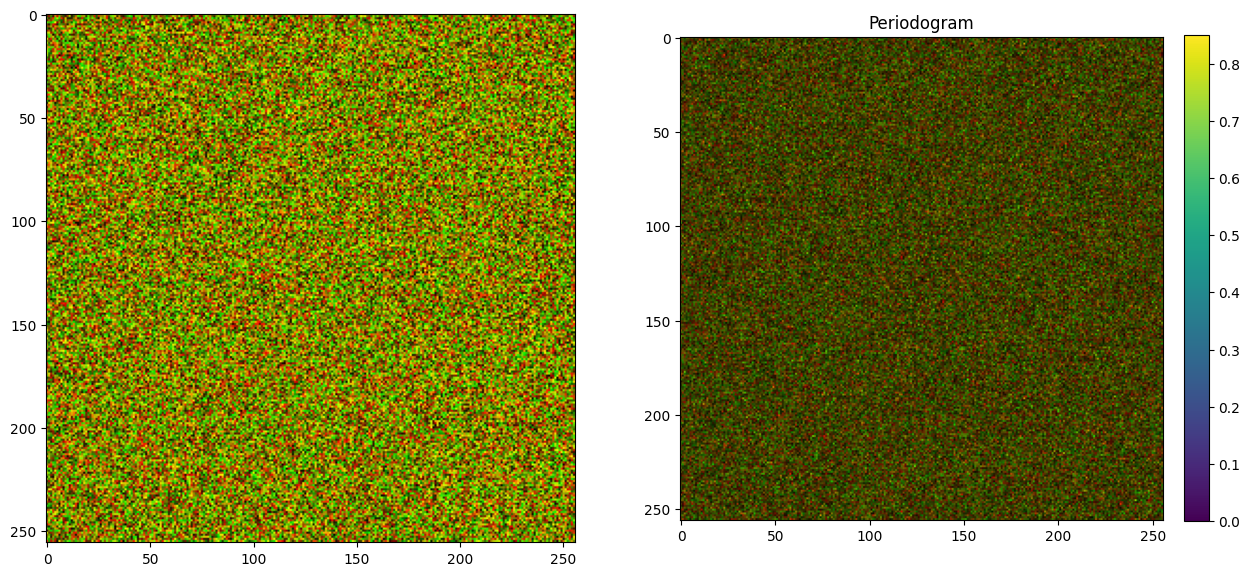

In [29]:
def plotFFT2D(pattern):
  fig, axs = plt.subplots(1, 2, figsize=(15, 10))
  axs[0].imshow(pattern)
  axs[1].set_title('Periodogram')
  shift_r = np.abs(np.fft.fftshift(np.fft.fft2(r_channel - np.mean(r_channel)) / r_channel.shape[0]))
  shift_g = np.abs(np.fft.fftshift(np.fft.fft2(g_channel - np.mean(g_channel)) / g_channel.shape[0]))
  shift_b = np.zeros_like(shift_r)
  img2D_periodogram = np.dstack((shift_r, shift_g, np.zeros_like(shift_r)))
  im = axs[1].imshow(img2D_periodogram, vmin=0.0, vmax=0.85)
  fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)
  plt.savefig("start_2D_mask_with_spec.png")

plotFFT2D(img2D)